# Prediksi Kelulusan Mahasiswa Menggunakan Bayesian Network

Notebook ini bertujuan untuk memprediksi kelulusan mahasiswa berdasarkan beberapa faktor seperti presensi, pengumpulan tugas, nilai UTS, nilai UAS, dan variabel lain, menggunakan pendekatan Bayesian Network.

## Tujuan
- Membangun model Bayesian Network sederhana untuk prediksi kelulusan.
- Menjelaskan setiap tahapan proses dari pembuatan model hingga inferensi.


Bayesian Network adalah salah satu model reasoning probabilistik yang memungkinkan kita memodelkan ketidakpastian dan hubungan sebab-akibat antar variabel. Pada proyek ini, kita membangun model Bayesian Network untuk memprediksi kelulusan mahasiswa berdasarkan beberapa faktor seperti presensi, tugas, dan hasil ujian.

Model dan algoritma inference pada Bayesian Network ini dijelaskan pada buku Artificial Intelligence: A Modern Approach (AIMA) oleh Stuart Russell dan Peter Norvig, khususnya pada bab Probabilistic Reasoning.

### Struktur Bayesian Network

## Struktur Bayesian Network

**Node/Variabel:**
- **P**: Presensi (Low/High)
- **T**: Tugas dikumpulkan (Yes/No)
- **E**: Nilai UTS (Low/High)
- **F**: Nilai UAS (Low/High)
- **G**: Lulus (Yes/No)

**Hubungan antar variabel:**
- Presensi mempengaruhi Tugas
- Tugas mempengaruhi UTS
- UTS mempengaruhi UAS
- UAS mempengaruhi status kelulusan


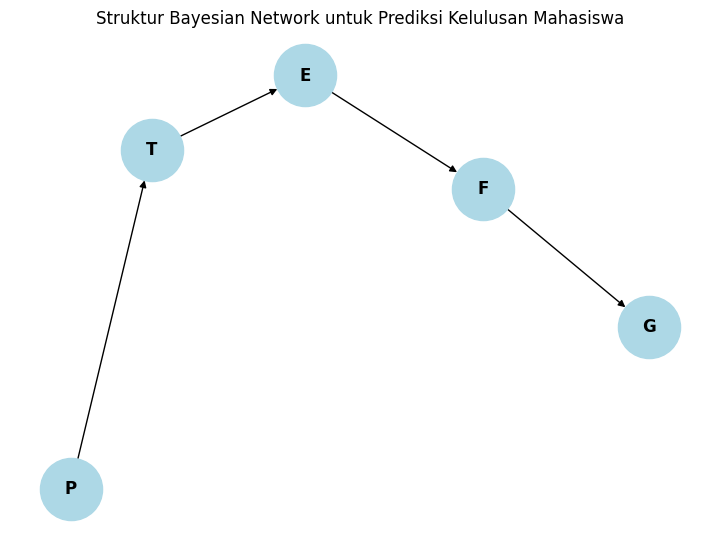

In [22]:
# --- Import Library ---
import networkx as nx
import matplotlib.pyplot as plt

# --- Buat Struktur Jaringan ---
edges = [('P', 'T'), ('T', 'E'), ('E', 'F'), ('F', 'G')]
G = nx.DiGraph(edges)

# --- Visualisasi Struktur Bayesian Network ---
plt.figure(figsize=(7, 5))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=2000, font_size=12, font_weight="bold")
plt.title("Struktur Bayesian Network untuk Prediksi Kelulusan Mahasiswa")
plt.show()


### Import Library untuk Bayesian Network

In [23]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

## Inferensi: Prediksi Probabilitas Kelulusan

Sekarang kita akan menggunakan model yang sudah dibuat untuk melakukan inferensi, yaitu menghitung probabilitas mahasiswa lulus dengan berbagai kondisi (misal: presensi tinggi, tugas dikumpulkan, dsb).


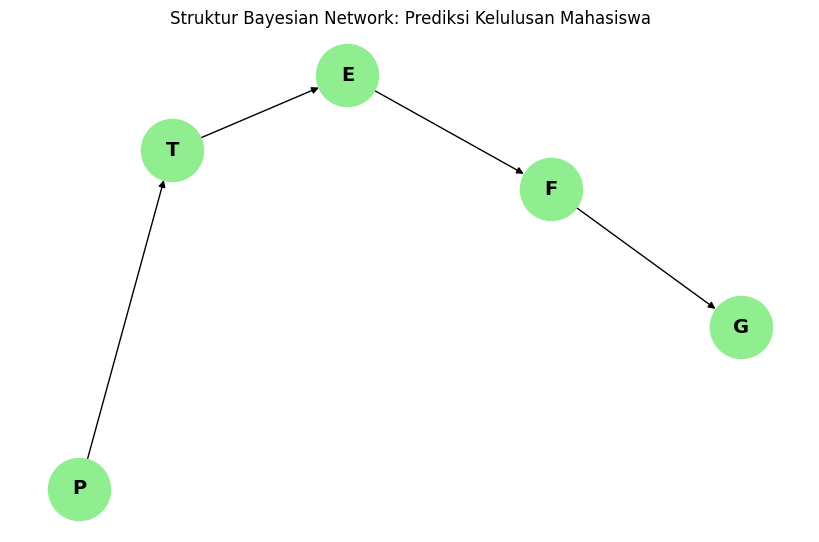


==== Contoh Inferensi ====
Probabilitas Kelulusan tanpa evidence apapun:
+------+----------+
| G    |   phi(G) |
+======+==========+
| G(0) |   0.4930 |
+------+----------+
| G(1) |   0.5070 |
+------+----------+

Probabilitas Kelulusan jika Presensi = High (P=1) dan Tugas = Yes (T=1):
+------+----------+
| G    |   phi(G) |
+======+==========+
| G(0) |   0.4650 |
+------+----------+
| G(1) |   0.5350 |
+------+----------+

Probabilitas Kelulusan jika Presensi = Low (P=0), Tugas = No (T=0):
+------+----------+
| G    |   phi(G) |
+======+==========+
| G(0) |   0.5450 |
+------+----------+
| G(1) |   0.4550 |
+------+----------+


In [27]:
# prediksi_kelulusan.py

import matplotlib.pyplot as plt
import networkx as nx
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

# ====== Definisi Struktur Bayesian Network ======
# P: Presensi (0=Low, 1=High)
# T: Tugas dikumpulkan (0=No, 1=Yes)
# E: Nilai UTS (0=Low, 1=High)
# F: Nilai UAS (0=Low, 1=High)
# G: Kelulusan (0=Tidak Lulus, 1=Lulus)

model = DiscreteBayesianNetwork([('P', 'T'), ('T', 'E'), ('E', 'F'), ('F', 'G')])

# ====== Definisi CPD (Conditional Probability Distribution) ======
cpd_p = TabularCPD(variable='P', variable_card=2, values=[[0.3], [0.7]])
cpd_t = TabularCPD(variable='T', variable_card=2, 
                   values=[[0.7, 0.2],   # Tugas No
                           [0.3, 0.8]],  # Tugas Yes
                   evidence=['P'],
                   evidence_card=[2])
cpd_e = TabularCPD(variable='E', variable_card=2, 
                   values=[[0.6, 0.2],   # UTS Low
                           [0.4, 0.8]],  # UTS High
                   evidence=['T'],
                   evidence_card=[2])
cpd_f = TabularCPD(variable='F', variable_card=2,
                   values=[[0.65, 0.25],  # UAS Low
                           [0.35, 0.75]], # UAS High
                   evidence=['E'],
                   evidence_card=[2])
cpd_g = TabularCPD(variable='G', variable_card=2,
                   values=[[0.8, 0.3],   # Tidak Lulus
                           [0.2, 0.7]],  # Lulus
                   evidence=['F'],
                   evidence_card=[2])

model.add_cpds(cpd_p, cpd_t, cpd_e, cpd_f, cpd_g)
assert model.check_model(), "Model Bayesian Network tidak valid!"

# ====== Visualisasi Struktur Jaringan ======
edges = [('P', 'T'), ('T', 'E'), ('E', 'F'), ('F', 'G')]
G = nx.DiGraph(edges)
plt.figure(figsize=(8, 5))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color="lightgreen", node_size=2000, font_size=14, font_weight="bold")
plt.title("Struktur Bayesian Network: Prediksi Kelulusan Mahasiswa")
plt.show()

# ====== Inferensi: Prediksi Kelulusan ======
infer = VariableElimination(model)

print("\n==== Contoh Inferensi ====")
print("Probabilitas Kelulusan tanpa evidence apapun:")
result0 = infer.query(variables=['G'])
print(result0)

print("\nProbabilitas Kelulusan jika Presensi = High (P=1) dan Tugas = Yes (T=1):")
result1 = infer.query(variables=['G'], evidence={'P': 1, 'T': 1})
print(result1)

print("\nProbabilitas Kelulusan jika Presensi = Low (P=0), Tugas = No (T=0):")
result2 = infer.query(variables=['G'], evidence={'P': 0, 'T': 0})
print(result2)


### Inferensi Probabilitas Kelulusan Mahasiswa


2025-06-20 03:40:23.044 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 03:40:23.046 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 03:40:23.242 
  command:

    streamlit run C:\Users\Ajeng Nursyifa\AppData\Roaming\Python\Python313\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-06-20 03:40:23.244 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 03:40:23.245 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 03:40:23.247 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 03:40:23.253 Thread 'MainThread': missing ScriptRunContext! This warn

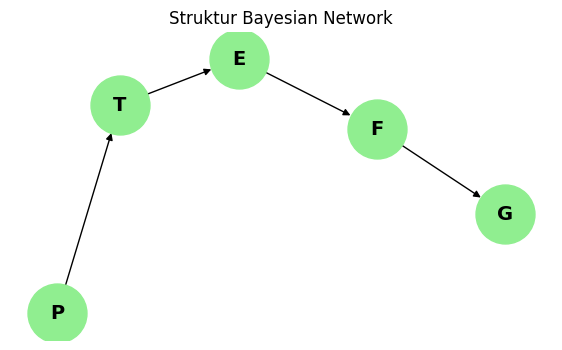

In [28]:
# streamlit_prediksi_kelulusan.py

import streamlit as st
import matplotlib.pyplot as plt
import networkx as nx
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

st.set_page_config(page_title="Prediksi Kelulusan Mahasiswa", layout="centered")

st.title("🎓 Prediksi Kelulusan Mahasiswa dengan Bayesian Network")

st.markdown(
    """
    Masukkan kondisi mahasiswa pada form di bawah. Model Bayesian Network akan menghitung probabilitas kelulusan berdasarkan input tersebut.
    """
)

# Struktur BN
model = DiscreteBayesianNetwork([('P', 'T'), ('T', 'E'), ('E', 'F'), ('F', 'G')])
cpd_p = TabularCPD('P', 2, [[0.3], [0.7]])
cpd_t = TabularCPD('T', 2, [[0.7, 0.2], [0.3, 0.8]], evidence=['P'], evidence_card=[2])
cpd_e = TabularCPD('E', 2, [[0.6, 0.2], [0.4, 0.8]], evidence=['T'], evidence_card=[2])
cpd_f = TabularCPD('F', 2, [[0.65, 0.25], [0.35, 0.75]], evidence=['E'], evidence_card=[2])
cpd_g = TabularCPD('G', 2, [[0.8, 0.3], [0.2, 0.7]], evidence=['F'], evidence_card=[2])
model.add_cpds(cpd_p, cpd_t, cpd_e, cpd_f, cpd_g)
infer = VariableElimination(model)

# --- Input Multivalue ---
st.header("Input Kondisi Mahasiswa (Boleh diisi sebagian atau semua)")

col1, col2 = st.columns(2)
with col1:
    presensi = st.selectbox("Presensi", options=["-", "Low", "High"])
    tugas = st.selectbox("Tugas dikumpulkan", options=["-", "No", "Yes"])
    uts = st.selectbox("Nilai UTS", options=["-", "Low", "High"])
with col2:
    uas = st.selectbox("Nilai UAS", options=["-", "Low", "High"])

evidence = {}
if presensi != "-": evidence["P"] = 0 if presensi == "Low" else 1
if tugas != "-": evidence["T"] = 0 if tugas == "No" else 1
if uts != "-": evidence["E"] = 0 if uts == "Low" else 1
if uas != "-": evidence["F"] = 0 if uas == "Low" else 1

# --- Inferensi & Output ---
st.subheader("Hasil Prediksi Kelulusan")
try:
    result = infer.query(variables=["G"], evidence=evidence if evidence else None)
    prob_lulus = result.values[1] * 100
    prob_tidak = result.values[0] * 100
    st.success(f"**Probabilitas Lulus:** {prob_lulus:.2f}%")
    st.info(f"**Probabilitas Tidak Lulus:** {prob_tidak:.2f}%")
    st.write(result)
except Exception as e:
    st.error(f"Error saat inferensi: {e}")

# --- Visualisasi Bayesian Network ---
st.subheader("Visualisasi Struktur Bayesian Network")
edges = [('P', 'T'), ('T', 'E'), ('E', 'F'), ('F', 'G')]
G = nx.DiGraph(edges)
fig, ax = plt.subplots(figsize=(7, 4))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color="lightgreen", node_size=1800, font_size=14, font_weight="bold", ax=ax)
ax.set_title("Struktur Bayesian Network")
st.pyplot(fig)

# --- Keterangan Node ---
with st.expander("Keterangan Node & Value"):
    st.markdown("""
    - **P**: Presensi (`Low`/`High`)
    - **T**: Tugas dikumpulkan (`No`/`Yes`)
    - **E**: Nilai UTS (`Low`/`High`)
    - **F**: Nilai UAS (`Low`/`High`)
    - **G**: Kelulusan (`Tidak Lulus`/`Lulus`)
    """)
